calculate normal, for complete  measurement of 𝜑ℎ,𝑟 , 𝜑𝑣,𝑟 , 𝜑ℎ,𝑜 , 𝜑𝑣,𝑜 , please refer to p2_calculation

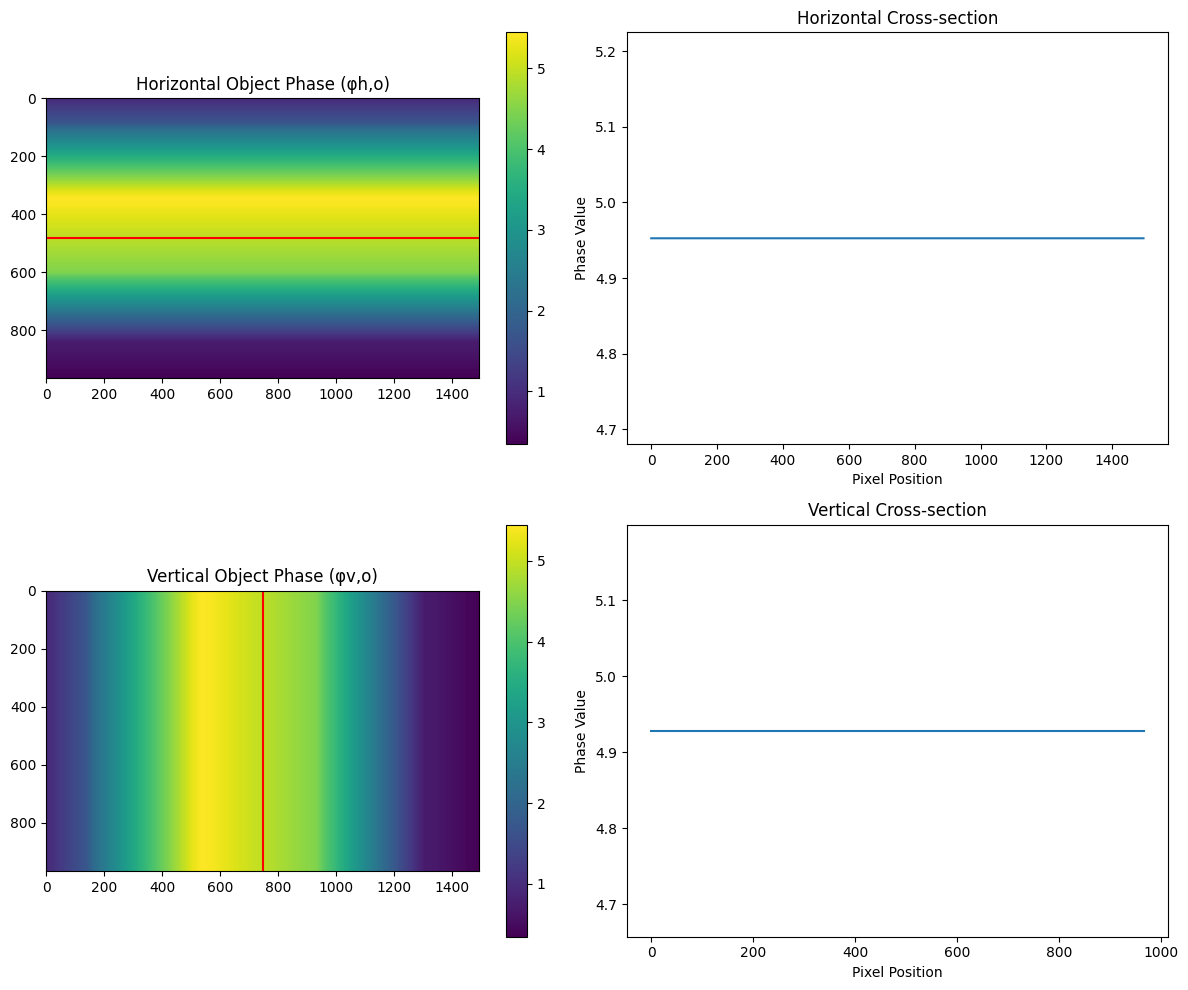

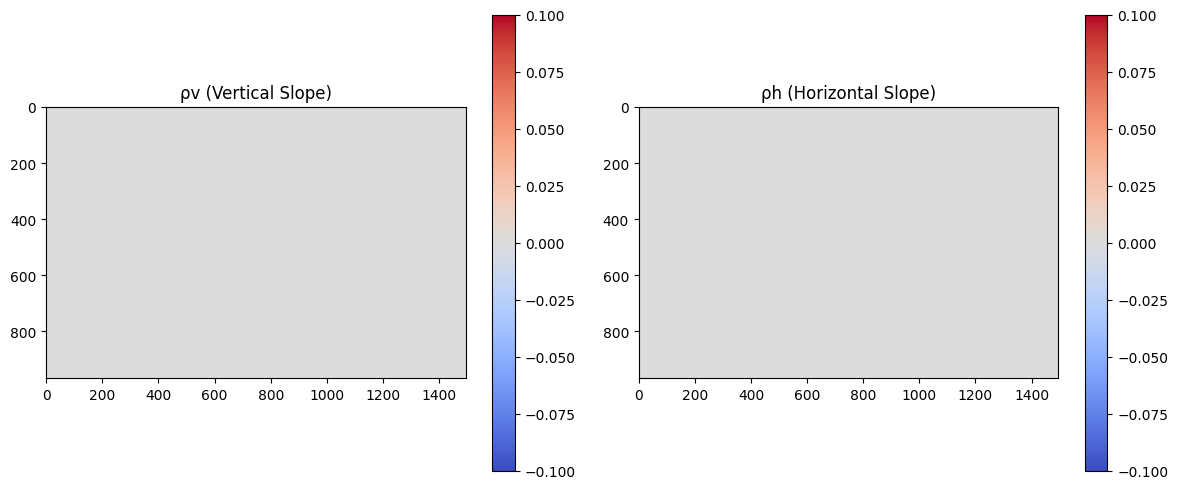

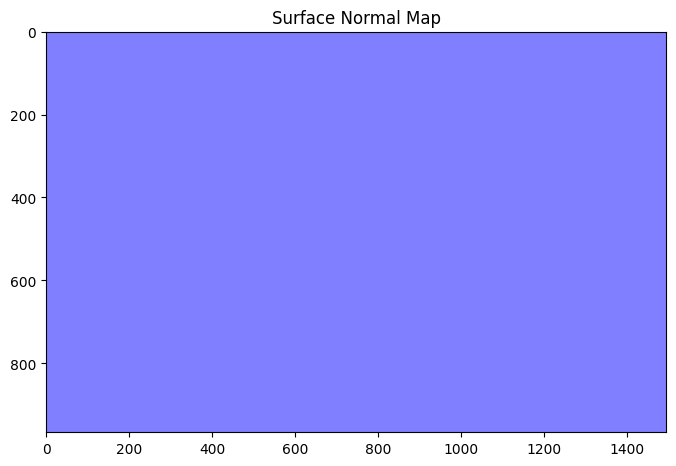

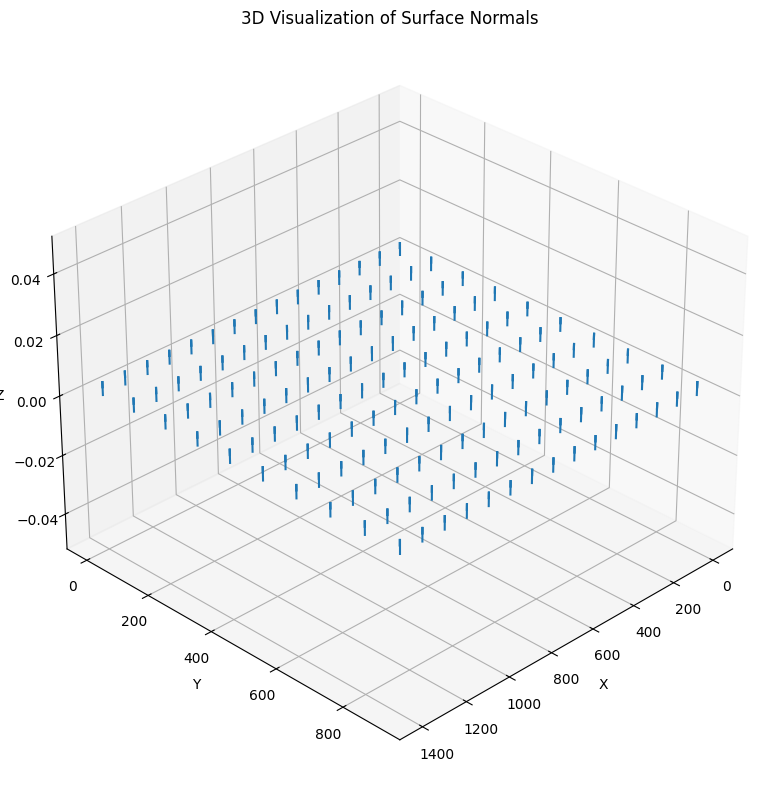

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image




# Step 1: Load the four phase images as PNG files
# Replace these with your actual file paths
phi_h_r = np.array(Image.open('phi_h_r.png').convert('L')) / 255.0 * 2 * np.pi  # Horizontal reference
phi_v_r = np.array(Image.open('phi_v_r.png').convert('L')) / 255.0 * 2 * np.pi  # Vertical reference
phi_h_o = np.array(Image.open('phi_h_r.png').convert('L')) / 255.0 * 2 * np.pi  # Horizontal object
phi_v_o = np.array(Image.open('phi_v_r.png').convert('L')) / 255.0 * 2 * np.pi  # Vertical object

# Converting grayscale images (0-255) to phase values (0-2π)
# Assuming the PNG files store phase information normalized to grayscale range

# Part a: Plot phi_h_o and phi_v_o with cross sections
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot horizontal object phase
im_h = axes[0, 0].imshow(phi_h_o, cmap='viridis')
axes[0, 0].set_title('Horizontal Object Phase (φh,o)')
plt.colorbar(im_h, ax=axes[0, 0])

# Plot vertical line for cross-section
row = phi_h_o.shape[0] // 2  # Middle row
axes[0, 0].axhline(y=row, color='r', linestyle='-')

# Plot cross-section
axes[0, 1].plot(phi_h_o[row, :])
axes[0, 1].set_title('Horizontal Cross-section')
axes[0, 1].set_xlabel('Pixel Position')
axes[0, 1].set_ylabel('Phase Value')

# Plot vertical object phase
im_v = axes[1, 0].imshow(phi_v_o, cmap='viridis')
axes[1, 0].set_title('Vertical Object Phase (φv,o)')
plt.colorbar(im_v, ax=axes[1, 0])

# Plot horizontal line for cross-section
col = phi_v_o.shape[1] // 2  # Middle column
axes[1, 0].axvline(x=col, color='r', linestyle='-')

# Plot cross-section
axes[1, 1].plot(phi_v_o[:, col])
axes[1, 1].set_title('Vertical Cross-section')
axes[1, 1].set_xlabel('Pixel Position')
axes[1, 1].set_ylabel('Phase Value')

plt.tight_layout()
plt.savefig('phase_maps_with_cross_sections.png')

# Part b: Calculate and plot rho_v and rho_h
rho_v = -(phi_v_o - phi_v_r)
rho_h = -(phi_h_o - phi_h_r)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im_rho_v = axes[0].imshow(rho_v, cmap='coolwarm')
axes[0].set_title('ρv (Vertical Slope)')
plt.colorbar(im_rho_v, ax=axes[0])

im_rho_h = axes[1].imshow(rho_h, cmap='coolwarm')
axes[1].set_title('ρh (Horizontal Slope)')
plt.colorbar(im_rho_h, ax=axes[1])

plt.tight_layout()
plt.savefig('slope_maps.png')

# Part c: Calculate and plot surface normal map
# Calculate denominator
denominator = np.sqrt(rho_v**2 + rho_h**2 + 1)

# Calculate normal vector components
nx = rho_v / denominator
ny = rho_h / denominator
nz = 1 / denominator

# Create RGB image from normal components
# Map from [-1,1] to [0,1] for RGB
normal_map = np.zeros((*nx.shape, 3))
normal_map[:,:,0] = (nx + 1) / 2  # Red channel
normal_map[:,:,1] = (ny + 1) / 2  # Green channel
normal_map[:,:,2] = (nz + 1) / 2  # Blue channel

plt.figure(figsize=(8, 8))
plt.imshow(normal_map)
plt.title('Surface Normal Map')
plt.savefig('normal_map.png')

### this part need to crop !!
# Part d: 3D visualization of surface normals
# Create a subsampled grid for quiver plot (to avoid overcrowding)
step = 100  # Adjust this value based on your image size
y, x = np.mgrid[0:nx.shape[0]:step, 0:nx.shape[1]:step]
u = nx[::step, ::step]  # x-component of normal
v = ny[::step, ::step]  # y-component of normal
w = nz[::step, ::step]  # z-component of normal

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Approach 1: Use the 'arrow_length_ratio' parameter
ax.quiver(x, y, np.zeros_like(x), u, v, w, 
          length=0.005, 
          normalize=True,
          arrow_length_ratio=0.5)  # Increase this value (default is 0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of Surface Normals')

# Adjust view for better visualization
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.savefig('3d_normals.png')

plt.show()

The values ρv and ρh represent the surface slopes in the x and y directions respectively. When calculating these values:

We subtract the reference phase maps from the object phase maps to isolate the phase changes caused by the object's surface.
The negative sign in the formula (ρv = -(φv,o - φv,r)) converts the phase differences to physical slopes.
When ρv = 0, the surface has no slope in the vertical direction at that point.
When ρh = 0, the surface has no slope in the horizontal direction at that point.
Areas where both ρv and ρh are zero correspond to flat regions of the surface.
Larger absolute values of ρv and ρh indicate steeper slopes in their respective directions.

These slope maps provide a quantitative measurement of the surface gradient, which is critical for reconstructing the 3D shape of the object.

